In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
%matplotlib inline
from joblib import dump
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import bowlers dataset
bowler_df = pd.read_csv("bowler.csv" ,encoding = "ISO-8859-1")

In [3]:
bowler_df

,Name,Balls,Runs,Wkts,Ave,Econ
0,Arshdeep Singh,79,89,0,0.00,6.75
1,Ravichandran Ashwin,6303,5180,156,33.20,4.93
2,Jasprit Bumrah,4311,3315,140,23.67,4.61
3,Yuzvendra Chahal,3739,3283,121,27.13,5.26
4,Kuldeep Yadav,4855,4132,160,25.82,5.10
...,...,...,...,...,...,...
605,RT Lyons (SCOT),1093,901,20,45.05,4.94
606,N Madziva (ZIM),520,519,20,25.95,5.98
607,JO Ngoche (KENYA),878,569,20,28.45,3.88
608,KMA Paul (WI),740,737,20,36.85,5.97


In [4]:
#check for null values
bowler_df.isnull().sum()

Name     0
Balls    0
Runs     0
Wkts     0
Ave      0
Econ     0
dtype: int64

In [5]:
#max,min and avg wickets taken by a bowler
bowler_df['Wkts'].max(),bowler_df['Wkts'].min(),bowler_df['Wkts'].mean()

(534, 0, 79.67213114754098)

In [6]:
#max, min and avg economy of bowler
bowler_df['Econ'].max(),bowler_df['Econ'].min(),bowler_df['Econ'].mean()

(6.91, 3.09, 4.802754098360656)

In [7]:
bowler_df['Ave'].max()

71.36

In [8]:
ave=round(bowler_df['Ave'].mean(),2)
ave

33.04

In [9]:
wkts=round(bowler_df['Wkts'].mean())
wkts

80

In [10]:
# Display the resulting DataFrame with categories
# Creating 4 different categories that will be used to classify a bowler

def select_best_bowler(row):
    ave = float(row['Ave'])
    wkts = int(row['Wkts'])
    econ = float(row['Econ'])
    
    if (ave <= 25) and (wkts >= 40) and (econ <= 6.5):
        return 'Excellent'
    elif (ave <= 30) and (wkts >= 30) and (econ <= 7.5):
        return 'Good'
    elif (ave <= 35) and (wkts >= 20) and (econ <= 8.5):
        return 'Average'
    else:
        return 'Not So Good'

# Create the target variable based on the criteria
bowler_df['Best_Bowler'] = bowler_df.apply(select_best_bowler, axis=1)


In [11]:
bowler_df['Best_Bowler'].value_counts()

Best_Bowler
Not So Good    224
Average        194
Good           134
Excellent       58
Name: count, dtype: int64

In [12]:
bowler_df= bowler_df.drop(labels=['Name'],axis=1)

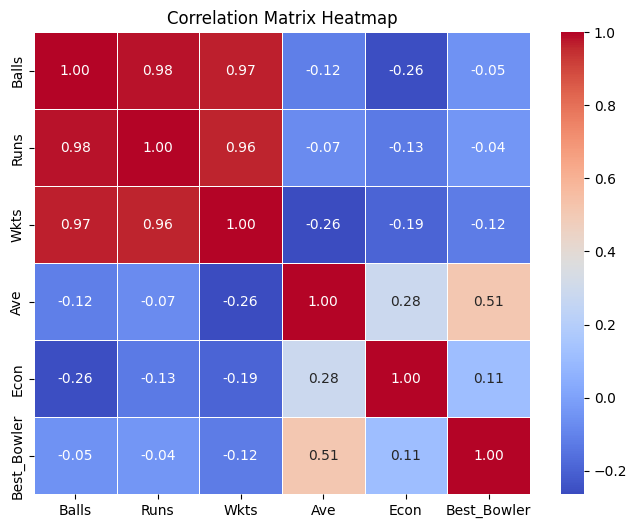

In [13]:
#identify correlation among features
import seaborn as sns

df = bowler_df.copy()

label_encoder = preprocessing.LabelEncoder() 
df['Best_Bowler']= label_encoder.fit_transform(df['Best_Bowler']) 

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

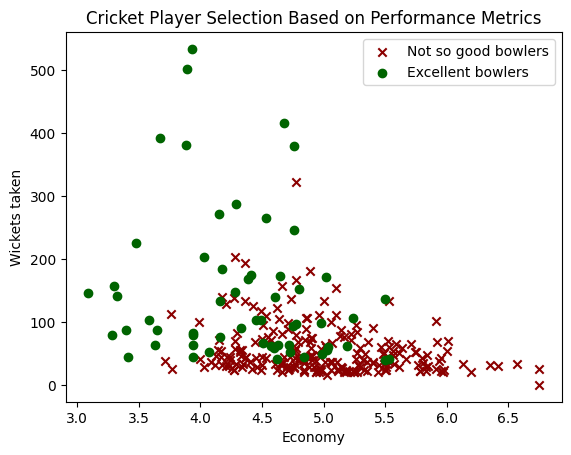

In [14]:
# scatter plot between wickets taken and economy
fig1, ax = plt.subplots()

# Scatter plot for selected players
selected = df[bowler_df['Best_Bowler'] == 'Not So Good']
ax.scatter(selected['Econ'], selected['Wkts'], color='#8B0000', marker='x', label='Not so good bowlers')

# Scatter plot for not selected players
not_selected = df[bowler_df['Best_Bowler'] == 'Excellent']
ax.scatter(not_selected['Econ'], not_selected['Wkts'], color='#006400', marker='o', label='Excellent bowlers')

# Add title and labels
ax.set_title('Cricket Player Selection Based on Performance Metrics')
ax.set_xlabel('Economy')
ax.set_ylabel('Wickets taken')

ax.legend()



In [15]:
from sklearn.model_selection import train_test_split
X = bowler_df[['Wkts','Ave','Econ']]
y = bowler_df['Best_Bowler']
X_train, X_test, y_train, y_test=train_test_split(X,y , test_size = 0.2 , random_state = 10)

In [16]:
#Feature scalling
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report


labels=['Wkts','Ave','Econ']

# Create models
model_accuracy = []
model_recall = []
model_precision = []
model_f1score = []
models = {
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion='entropy'),
    'SVC': SVC(probability=True),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Gaussian' : GaussianNB(),
    'Voting classifier': VotingClassifier(estimators=[('RF',RandomForestClassifier(n_estimators = 10)),('SVC', SVC(probability=True)), ('gnb', GaussianNB()),('LR',LogisticRegression())], voting='soft',weights=[0.7,2,1,2]),
}


# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test,y_pred, average='micro')
    model_accuracy.append(accuracy*100)
    model_recall.append(recall*100)
    model_precision.append(precision*100)
    print('\t\t------'+model_name+'------\n')
    print(classification_report(y_test, y_pred),'\n')
    for i in range(len(y_pred)):
        #for pred_name,  in y_pred.items():
        if y_pred[i]=='Excellent' and  y_pred[i] == 'Good':
         
            X_test_original = mms.inverse_transform(X_test_scaled[[i]]).flatten().astype(float)
            X_test_original = [round(val, 1) for val in X_test_original]


		------Random Forest------

              precision    recall  f1-score   support

     Average       1.00      0.97      0.98        33
   Excellent       1.00      1.00      1.00        14
        Good       0.97      1.00      0.98        32
 Not So Good       1.00      1.00      1.00        43

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122
 

		------SVC------

              precision    recall  f1-score   support

     Average       0.73      0.91      0.81        33
   Excellent       0.71      0.36      0.48        14
        Good       0.67      0.69      0.68        32
 Not So Good       0.98      0.93      0.95        43

    accuracy                           0.80       122
   macro avg       0.77      0.72      0.73       122
weighted avg       0.80      0.80      0.79       122
 

		------Logistic Regression------

              precision    recall  f1-score

In [18]:
dump(model,'./../models/bow_model.joblib')

['./../models/bow_model.joblib']

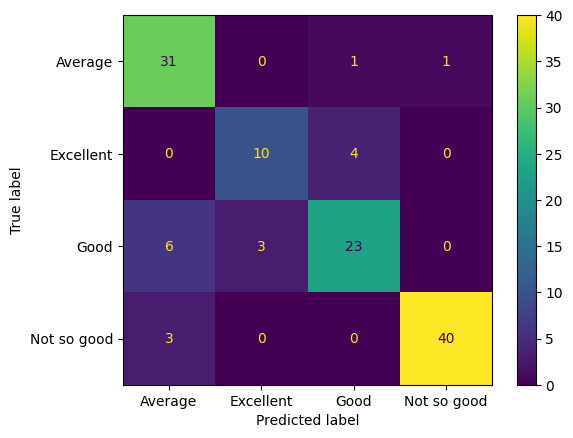

In [19]:
#Confusion matrix of voting classifier
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Average', 'Excellent','Good','Not so good'])
cm_display.plot()
plt.show()

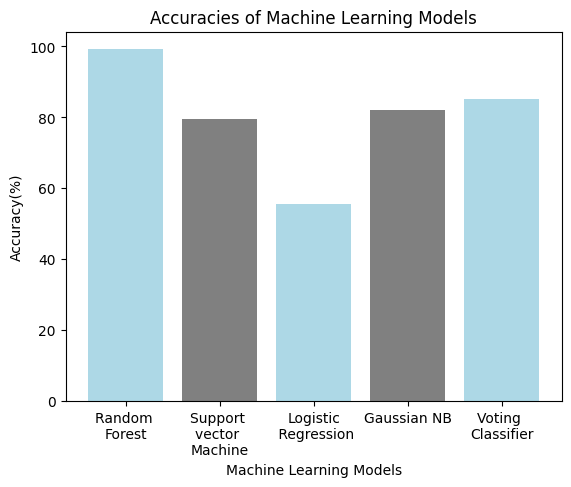

In [20]:
#print bar chart of accuracy
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracy scores
model_names = ['Random \nForest','Support \nvector \nMachine','Logistic\n Regression','Gaussian NB','Voting \nClassifier']

# Create a bar chart
plt.bar(model_names, model_accuracy, color=['lightblue', 'gray'])

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy(%)')
plt.title('Accuracies of Machine Learning Models')

# Show the bar chart
plt.show()

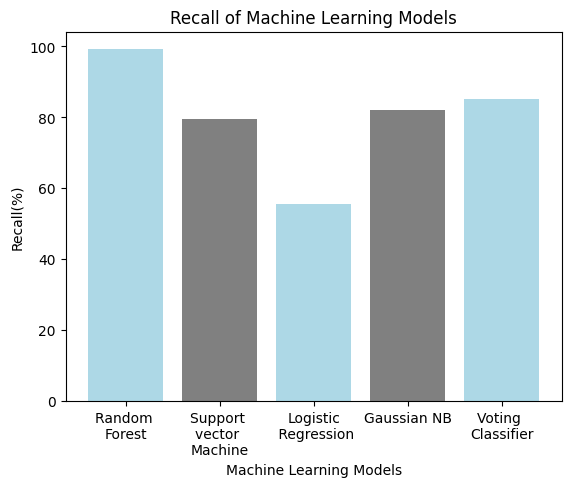

In [21]:
#print bar chart of recall
import matplotlib.pyplot as plt
# Create a bar chart
plt.bar(model_names, model_recall, color=['lightblue', 'gray'])

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Recall(%)')
plt.title('Recall of Machine Learning Models')

# Show the bar chart
plt.show()

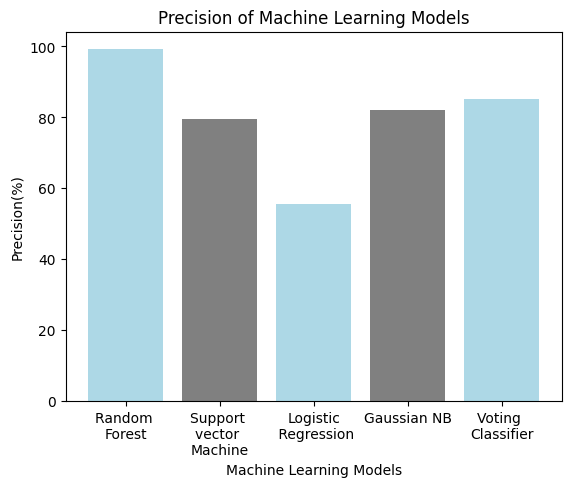

In [22]:
#print bar chart of precision
import matplotlib.pyplot as plt
# Create a bar chart
plt.bar(model_names, model_precision, color=['lightblue', 'gray'])

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Precision(%)')
plt.title('Precision of Machine Learning Models')

# Show the bar chart
plt.show()